Rain prediction using random forest algo

import liberaries

In [9]:
import numpy as np
import pandas as pd

Importing data set

In [10]:
dataset = pd.read_csv('weatherAUS.csv')
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = dataset.iloc[:,-1].values

In [11]:
dataset.shape

(145460, 23)

In [12]:
X.shape

(145460, 19)

In [30]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [13]:
print(Y)

['No' 'No' 'No' ... 'No' 'No' nan]


In [32]:
Y=Y.reshape(-1,1)

In [33]:
 print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [35]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 20.0 ... 15.0 20.9 'No']]


In [36]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


Encoding dataset

In [37]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

In [38]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


In [39]:
print(Y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [40]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [42]:
print(X)

[[-1.53166617  0.19132753 -0.04135977 ... -0.01407077  0.02310362
  -0.52979545]
 [-1.53166617 -0.75105231  0.26874452 ...  0.03244663  0.387799
  -0.52979545]
 [-1.53166617  0.11279588  0.35331842 ...  0.62166712  0.22733303
  -0.52979545]
 ...
 [ 1.20928479 -1.06517892  0.52246622 ... -0.69632607  0.65037966
  -0.52979545]
 [ 1.20928479 -0.68822699  0.53656187 ... -0.29317521  0.63579185
  -0.52979545]
 [ 1.20928479  0.42692249 -0.45013361 ... -0.30868102 -0.10818671
  -0.52979545]]


Splitting Dataset into Training set and Test set

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [44]:
print(X_train)

[[ 0.22535368  1.03946939  0.07140543 ...  0.68369032  0.08145488
  -0.52979545]
 [ 1.42012717 -0.45263203  0.11369237 ... -0.41722163  0.22733303
  -0.52979545]
 [ 0.50647685 -0.20133073 -0.14002932 ... -0.06058818 -0.02065982
   1.88752093]
 ...
 [ 1.0687232   0.75675544  0.93124006 ...  1.10234698  1.07342629
  -0.52979545]
 [ 0.57675765 -0.04426743 -0.16822062 ...  0.01694083 -0.28324049
   1.88752093]
 [ 1.63096955 -0.0285611  -0.91529006 ... -0.35519842 -0.76463838
  -0.52979545]]


In [45]:
print(Y_train)

[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


Training Model

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=0)
Y_train=Y_train.flatten() 
classifier.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [47]:
  classifier.score(X_train,Y_train)

0.9999312525780283

In [48]:
y_pred = le6.inverse_transform(np.array(classifier.predict(X_test),dtype=int))
Y_test=Y_test.flatten()
Y_test = le6.inverse_transform(np.array(Y_test,dtype=int))

In [49]:
print(y_pred)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [50]:
print(Y_test)

['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']


In [51]:
y_pred = y_pred.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

In [52]:
df = np.concatenate((Y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [61]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes                No
1                   Yes                No
2                    No                No
3                    No               Yes
4                    No                No
...                 ...               ...
29087                No               Yes
29088                No                No
29089               Yes                No
29090                No                No
29091                No                No

[29092 rows x 2 columns]


In [62]:
  dataframe.to_csv('prediction.csv')

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8521930427608965

In [64]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x252bb5d8310>,
 [Text(-0.9835245285847891, 0.4926251127095214, ''),
  Text(0.9835245516462336, -0.4926250666674154, '')])

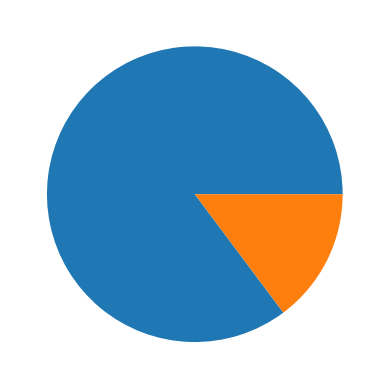

In [65]:
import numpy as py
y = np.array([0.8521930427608965,1-0.8521930427608965])
plt.pie(y)